In [1]:
import pysal as ps
from pysal.contrib import compact as com
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
%matplotlib inline

In [2]:
chains = ps.open(ps.examples.get_path('columbus.shp')).read()

In [3]:
reocks = [com.reock(chain) for chain in chains]

The reock index should vary between 0 and 1. If any reock measure is greater than 1, it means that the minimum bounding circle found has a smaller area than the area of the shape, which is impossible by the defintion of MBC. 

In [4]:
[(reocks.index(k), k) for k in reocks if k > 1]

[]

In [5]:
reocks

[0.5181241141140267,
 0.5007021448530843,
 0.4142321206451029,
 0.3691173977320912,
 0.6281211299986366,
 0.45319704567805574,
 0.4742085987690198,
 0.4969786162299148,
 0.5070595695632538,
 0.46794699464889,
 0.49787161299395916,
 0.3877377873261624,
 0.3399563550400969,
 0.3411080764041432,
 0.43463420365157673,
 0.4269883508302141,
 0.546098791798779,
 0.37393372634296373,
 0.3795061050164041,
 0.4830774965740454,
 0.32362923583916975,
 0.3882122351441752,
 0.49044702841912674,
 0.3586735382558894,
 0.5906840005520118,
 0.5213998122841581,
 0.49456059678231107,
 0.6356979126492079,
 0.5113332149409118,
 0.43775338735356495,
 0.2715412384779725,
 0.3223288401707723,
 0.2919059044565228,
 0.4662434194159314,
 0.40595387074450806,
 0.5248893503111812,
 0.5896112972216031,
 0.5410926711420471,
 0.35920053976267674,
 0.47176775229375195,
 0.6137238587468492,
 0.6461689652717776,
 0.6402290507526798,
 0.4750992741781224,
 0.6343974530339201,
 0.4686480535413637,
 0.5576130416033727,
 0.59

Ugh, this means our shit isn't working correctly. Let's debug. 

In [5]:
bads = [reocks.index(k) for k in reocks if k > 1]

In [6]:
bads

[]

In [7]:
for idx in bads:
    pset = [point for part in chains[idx].parts for point in part[:-1]]
    fig = plt.figure()
    ax1=fig.add_subplot(1,1,1)
    bad_mbc = com.mbc.minimum_bounding_circle(pset)
    radius, (cx, cy) = bad_mbc
    circ = plt.Circle((cx,cy), radius)
    ax1.add_patch(circ)
    plt.plot([p[0] for p in pset], [p[1] for p in pset], 'k')
    plt.show()

### just one example

In [8]:
pset = [point for part in chains[8].parts for point in part[:-1]]

In [9]:
pset = ConvexHull(pset).points.tolist()

In [10]:
com.mbc.not_clockwise(pset)

False

In [11]:
POINTS = [p for p in pset]

In [12]:
removed = []
i = 0

In [13]:
angles = [com.mbc._angle(com.mbc._prec(p, pset), p, com.mbc._succ(p, pset)) for p in pset]
circles = [com.mbc._circle(com.mbc._prec(p, pset), p, com.mbc._succ(p, pset)) for p in pset]
radii = [c[0] for c in circles]
lexord = np.lexsort((radii, angles))
lexmax = lexord[-1]
candidate = (com.mbc._prec(pset[lexmax], pset), 
             pset[lexmax], 
             com.mbc._succ(pset[lexmax], pset))

In [14]:
if not angles[lexmax] <= com.mbc.PI/2.:
    print('Failure!')
    removed.append((lexmax, pset.pop(lexmax)))
    i+=1
    print removed[-1]

Failure!
(12, [10.093509674072266, 12.900219917297363])


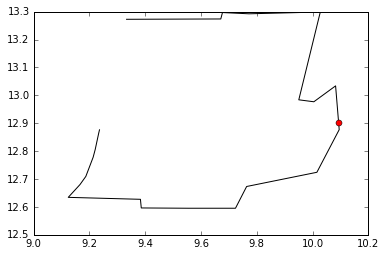

In [15]:
fig = plt.figure()
ax1=fig.add_subplot(1,1,1)
plt.plot([p[0] for p in POINTS], [p[1] for p in POINTS], 'k')
for i, (_, (px, py)) in enumerate(removed):
    plt.plot(px,py, 'ro', alpha=1./(len(removed)-i))
plt.show()